In [1]:
%tensorflow_version 2.x
import tensorflow

TensorFlow 2.x selected.


In [2]:
from google.colab import drive
drive.mount('/mnt/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /mnt/drive


In [0]:
import os
os.chdir('/mnt/drive/My Drive/Colab Notebooks')

In [4]:
from zipfile import ZipFile
with ZipFile('/mnt/drive/My Drive/Colab Notebooks/data_semantics.zip', 'r') as zip:
  zip.extractall()

KeyboardInterrupt: ignored

In [0]:
path = '/mnt/drive/My Drive/Colabs Notebook/'

In [0]:
img_height = 128
img_width = 128
original = os.listdir('./training/image_2')
mask = os.listdir('./training/semantic')

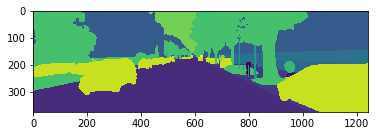

In [7]:
import cv2
import matplotlib.pyplot as plt
a = './training/semantic/000000_10.png'
img = cv2.imread(a,0)
plt.imshow(img)

In [8]:
print(img)

[[21 21 21 ... 11 11 11]
 [21 21 21 ... 11 11 11]
 [21 21 21 ... 11 11 11]
 ...
 [ 7  7  7 ... 26 26 26]
 [ 7  7  7 ... 26 26 26]
 [ 7  7  7 ... 26 26 26]]


In [9]:
import numpy as np

y = np.zeros((len(mask), img_height, img_width), dtype=np.float32)
x = np.zeros((len(original), img_height, img_width, 3), dtype=np.float32)

for file in original:
  n = original.index(file)
  path1 = os.path.join('./training/image_2', file)
  img = cv2.imread(path1, 1)
  try:
    img = cv2.resize(img, (128,128))
    x[n] = img/255
    file2 = mask[n]
    path2 = os.path.join('./training/semantic', file2)
    mask = np.array(cv2.imread(path2, 0))
    y_mask = (cv2.resize(mask,(128, 128))==26)*1.0
    y[n] = y_mask

  except Exception as e:
    print(e)

join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argument must be str or bytes, not 'ndarray'
join() argum

In [10]:
print(x.shape)
print(y.shape)

(200, 128, 128, 3)
(200, 128, 128)


In [11]:
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-ca2dzqfw
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-ca2dzqfw
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-cp36-none-any.whl size=33588 sha256=137326c1fcdd232a0731299171ab1d2081493447d1ac0517a18161ec8cc255b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-e53eqw7y/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


In [12]:
import segmentation_models
segmentation_models.set_framework('tf.keras')
from segmentation_models import Unet 
from segmentation_models.backbones.backbones_factory import Backbones 
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
from tensorflow.keras.layers import Input,Conv2D
from tensorflow.keras.models import Model

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.15, random_state=2019)

In [0]:
BACKBONE = 'resnet34'
preprocess_input = Backbones.get_preprocessing(BACKBONE)

In [0]:
x_train = preprocess_input(X_train)
y_train = preprocess_input(y_train)

In [0]:
x_val = preprocess_input(X_valid)

In [19]:
x_val.shape

(30, 128, 128, 3)

In [20]:
x_train.shape

(170, 128, 128, 3)